# Problem 2

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description
- <b>Consider a grid of N buses to which generators and loads are connected, and discover a grid loss function based on M per-bus power injection readings and the corresponding M total grid loss measurements.<b>

    _______________________________________________________________________________________________________________________

Considered "Kite" 5 Bus Network

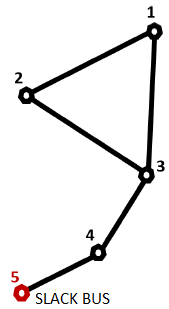

- <b>Implementation.<b>

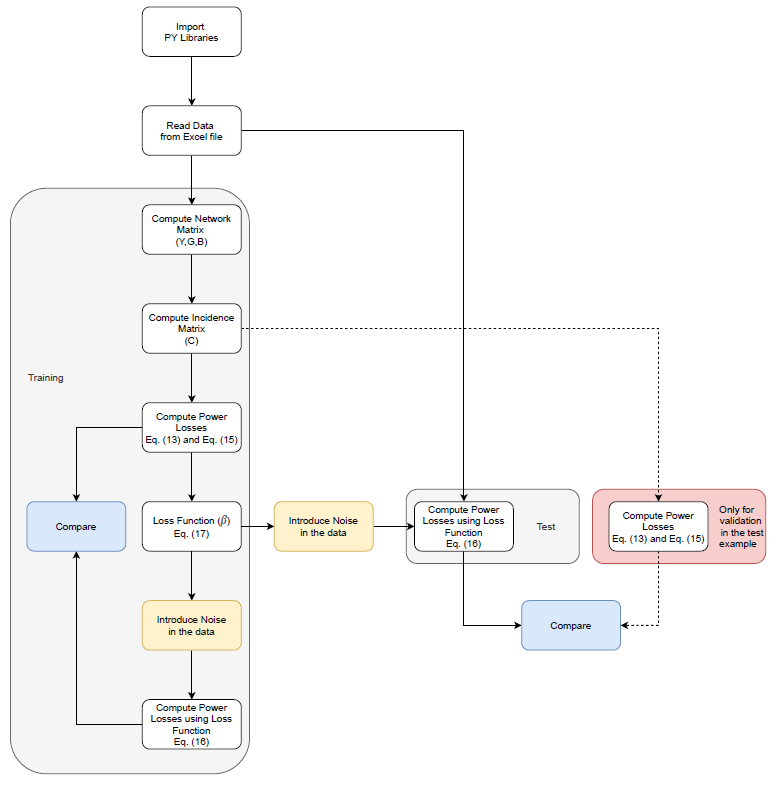

<b>Import Python Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt


<b>Parameters

In [3]:
noiseFactor=0.0025     #noise
networkFactor=100      #to change the characteristics of the network (Y)
PtestFactor=3          #to obtain losses similar to the training data;

<b>Import data (From Excel file)

In [4]:
Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Info', header=None))
# Information about the slack bus
SlackBus=Info[0,1]
print ("Slack Bus: ", SlackBus,"\n")

# Network Information
Net_Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Y_Data'))
print ("Lines information (Admitances)\n", Net_Info, "\n")

#Power Information (train)
Power_Info = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Load(t,Bus)'))
Power_Info = np.delete(Power_Info,[0],1)
print ("Power consumption information (time, Bus) - (Train)\n", Power_Info, "\n")

#Power Information (test)
Power_Test = np.array(pd.read_excel (r'DASG_Prob2_new.xlsx', sheet_name='Test_Load(t,Bus)'))
Power_Test = np.delete(Power_Test,[0],1)
print ("Power consumption information (time, Bus) - (Test)\n", Power_Test)

time=Power_Info.shape[0]
P=Power_Info
Ptest=Power_Test *PtestFactor

Slack Bus:  5 

Lines information (Admitances)
 [[1 2 '0,01-0,1i']
 [1 3 '0,02-0,2i']
 [2 3 '0,03-0,2i']
 [3 4 '0,03-0,2i']
 [4 5 '0,02-0,2i']] 

Power consumption information (time, Bus) - (Train)
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]
 [0.684 0.528 0.256 0.44 ]] 

Power consumption information (time, Bus) - (Test)
 [[0.18  0.06  0.188 0.132]
 [0.1   0.06  0.992 0.132]
 [0.388 0.1   1.576 0.132]
 [0.28  0.196 0.08  1.94 ]
 [0.5   0.184 0.064 0.572]
 [1.16  0.108 0.064 0.188]
 [1.036 0.06  0.068 0.08 ]
 [1.036 0.064 0.112 0.064]
 [1.768 0.064 0.2   0.068]
 [0.804 0.092 0.184 0.064]
 [0.824 0.196 0.088 0.096]
 [0.52  0.188 0.064 0.196]
 [0.184 0.104 0.068 0.192]]


<b>Admittance Matrix(Y); Conductance Matrix(G); Susceptance Matrix(B)

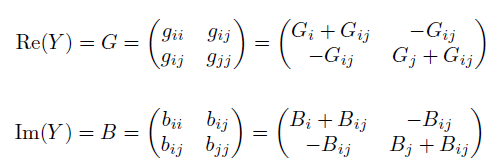

In [5]:
# Determine the number of Bus
nBus=max(np.max(Net_Info[:,0]),np.max(Net_Info[:,1]))

# Create the variable number of lines and the admitance matrix (Y)
nLines=Net_Info.shape[0]

Y=np.zeros((nBus,nBus), dtype=complex)

#Complete the Y matrix nad update the number of lines
for i in range (Net_Info.shape[0]):
    y_aux=Net_Info[i,2].replace(",",".")
    y_aux=y_aux.replace("i","j")
    Y[Net_Info[i,0]-1,Net_Info[i,0]-1]=Y[Net_Info[i,0]-1,Net_Info[i,0]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,1]-1]=Y[Net_Info[i,1]-1,Net_Info[i,1]-1]+complex(y_aux)*networkFactor
    Y[Net_Info[i,0]-1,Net_Info[i,1]-1]=Y[Net_Info[i,0]-1,Net_Info[i,1]-1]-complex(y_aux)*networkFactor
    Y[Net_Info[i,1]-1,Net_Info[i,0]-1]=Y[Net_Info[i,1]-1,Net_Info[i,0]-1]-complex(y_aux)*networkFactor

            
# Remove the slack bus from the admitance matrix            
Yl=np.delete(Y, np.s_[SlackBus-1], axis=0)
Yl=np.delete(Yl, np.s_[SlackBus-1], axis=1)

# Conductance Matrix
G=Yl.real

# Susceptance Matrix
B=Yl.imag 
print("The admitance matrix Y is:\n", Y, "\n")
print("The conductance matrix G is\n", G, "\n")
print("The susceptance matrix B is\n",B, "\n")


The admitance matrix Y is:
 [[ 3.-30.j -1.+10.j -2.+20.j  0. +0.j  0. +0.j]
 [-1.+10.j  4.-30.j -3.+20.j  0. +0.j  0. +0.j]
 [-2.+20.j -3.+20.j  8.-60.j -3.+20.j  0. +0.j]
 [ 0. +0.j  0. +0.j -3.+20.j  5.-40.j -2.+20.j]
 [ 0. +0.j  0. +0.j  0. +0.j -2.+20.j  2.-20.j]] 

The conductance matrix G is
 [[ 3. -1. -2.  0.]
 [-1.  4. -3.  0.]
 [-2. -3.  8. -3.]
 [ 0.  0. -3.  5.]] 

The susceptance matrix B is
 [[-30.  10.  20.   0.]
 [ 10. -30.  20.   0.]
 [ 20.  20. -60.  20.]
 [  0.   0.  20. -40.]] 



<b>Incidence Matrix (Bus,Lines)

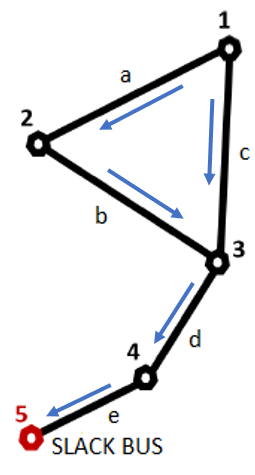

In [6]:
# Create the vectors
C=np.zeros((nBus,nLines))
nLine_Aux=0

# Determine the Incidence Matrix
for i in range (Y.shape[0]):
    for j in range (i+1,Y.shape[1]):
        if np.absolute(Y[i,j])!=0:
            C[i,nLine_Aux]=1
            C[j,nLine_Aux]=-1
            nLine_Aux=nLine_Aux+1           

#Remove the slack bus from the matrix
Cl=np.delete(C, np.s_[SlackBus-1], axis=0)

print ("The incidence matrix C (nBus,nLines) is:\n",Cl)

The incidence matrix C (nBus,nLines) is:
 [[ 1.  1.  0.  0.  0.]
 [-1.  0.  1.  0.  0.]
 [ 0. -1. -1.  1.  0.]
 [ 0.  0.  0. -1.  1.]]


<b>Definition of Matrix Gij (Diagonal and vector)

In [7]:
# Create the vectors
Gv=np.zeros((1,nLines))
Gd=np.zeros((nLines,nLines))
nLine_Aux=0

# Determine the Incidence Matrix
for i in range (Y.shape[0]):
    for j in range (i+1,Y.shape[1]):
        if np.absolute(Y[i,j])!=0:
            Gv[0,nLine_Aux]=-np.real(Y[i,j])          #Information about the lines condutance [Vector]
            Gd[nLine_Aux,nLine_Aux]=-np.real(Y[i,j])  #Information about the lines condutance [Diagonal in matrix]
            nLine_Aux=nLine_Aux+1           


print ("Gij_Diag:\n",Gd)

Gij_Diag:
 [[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 2.]]


<b>Definition of the Power Losses in two different ways, following equations (13) and (15) of lectures.

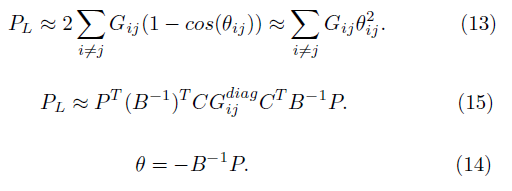

In [8]:
#Matrix creation
teta=np.zeros((nBus-1,time))
grau=np.zeros((nLines,time))
PL=np.zeros((time))
PL2=np.zeros((time))
PT=np.zeros((time))
rLoss=np.zeros((time))

#Losses
alfa=np.dot(np.dot(np.dot(np.dot(np.linalg.inv(B),Cl),Gd),np.transpose(Cl)),np.linalg.inv(B))  #Used in Equation (15)

for m in range (time):
    PL[m]=np.dot(P[m,:],np.dot(alfa,np.transpose(P[m,:])))  #Power Losses using equation (15)
    
    teta[:,m]=np.dot(np.linalg.inv(B),np.transpose(P[m,:])) #Voltage angle (Teta). Equation (14) 

    grau[:,m]=np.dot(np.transpose(Cl),teta[:,m])            #Voltage angle difference (Teta ij)

    PL2[m]=np.dot(2*Gv,1-np.cos(grau[:,m]))                 #Power Losses using equation (13)

    PT[m]=np.sum([P[m,:]])                                  #Total Power   

    rLoss[m]=np.divide(PL2[m],PT[m])                        #Power Losses (%)

print ("Total Power consumption:\n",PT ,"\n")    
print ("Power Losses obtained using the Theta:\n",PL2 ,"\n")  
print ("Power Losses obtained without using the Theta:\n",PL ,"\n")  

Total Power consumption:
 [0.6   0.74  2.576 5.168 5.456 5.476 5.012 3.252 3.664 5.388 2.212 1.504
 1.908] 

Power Losses obtained using the Theta:
 [0.0040525  0.00665397 0.08342236 0.38413184 0.30832255 0.39635134
 0.17306509 0.08269704 0.15806927 0.38605897 0.05446394 0.02942382
 0.0388501 ] 

Power Losses obtained without using the Theta:
 [0.00405272 0.00665461 0.0835298  0.38592245 0.3096688  0.39823976
 0.1737622  0.08283    0.15840609 0.38795136 0.05450801 0.02943516
 0.0388715 ] 



/tmp/ipykernel_5288/3789998883.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  PL2[m]=np.dot(2*Gv,1-np.cos(grau[:,m]))                 #Power Losses using equation (13)


<b>Discovering the loss function

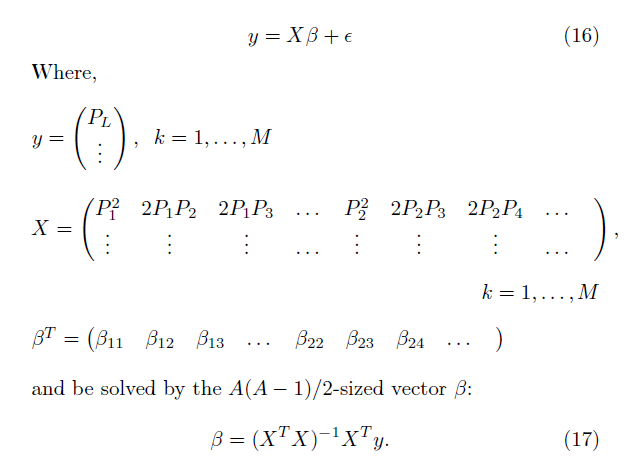

TO BE DONE

In [37]:
y = PL2.copy()
# X = Power_Info.copy()
A = C.shape[0]
X = np.zeros([time, int(A * (A-1) / 2)])





xTx_1 = LA.inv(np.transpose(X) @ X)

beta = xTx_1 @ np.transpose(X) @ y
print('Beta =', beta)

LinAlgError: Singular matrix

<b>Plot Results (Training)

TO BE DONE

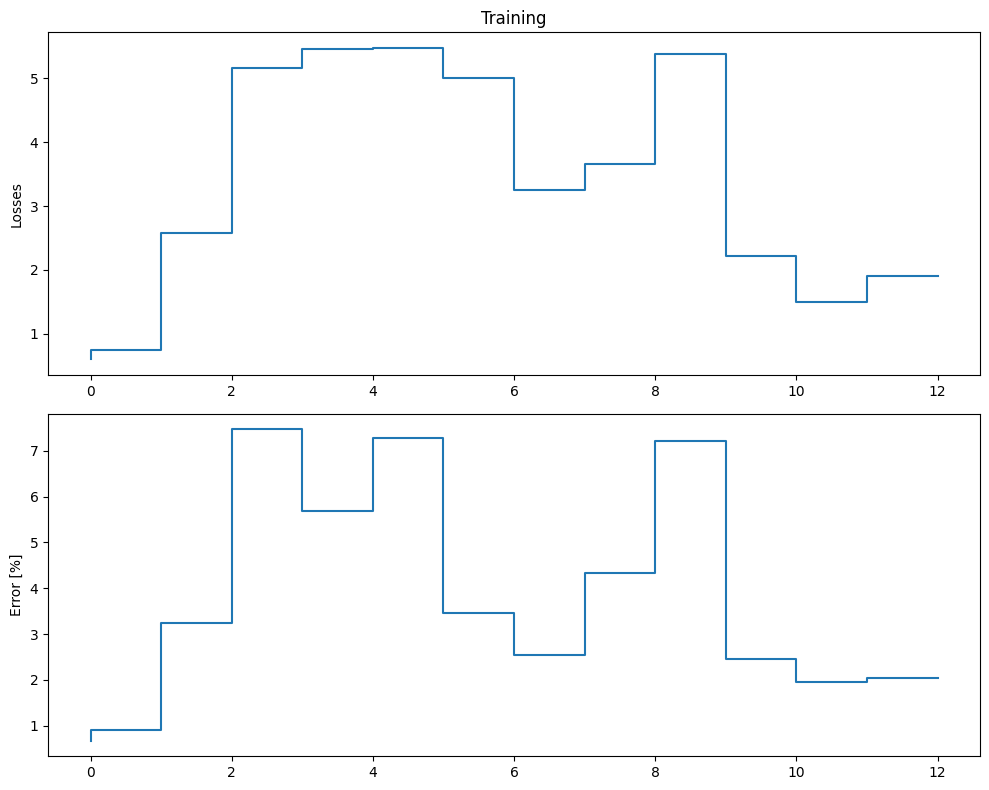

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].step(range(time), PT)
axs[0].set_title('Training')
axs[0].set_ylabel('Losses')

axs[1].step(range(time), PL / PT * 100)
axs[1].set_ylabel('Error [%]')

plt.tight_layout()
plt.show()

**Test DataSet**
    
Use Loss Function (Beta Coeficients), to compute the losses considering a new Power Consumption dataset (Ptest). 

In [11]:
alfa = LA.inv(B) @ Cl @ Gd @ np.transpose(Cl) @ LA.inv(B) # Used in Equation (15)

# for m in range (time):
#     PL[m]=np.dot(P[m,:],np.dot(alfa,np.transpose(P[m,:])))  #Power Losses using equation (15)
    
#     teta[:,m]=np.dot(np.linalg.inv(B),np.transpose(P[m,:])) #Voltage angle (Teta). Equation (14) 

#     grau[:,m]=np.dot(np.transpose(Cl),teta[:,m])            #Voltage angle difference (Teta ij)

#     PL2[m]=np.dot(2*Gv,1-np.cos(grau[:,m]))                 #Power Losses using equation (13)

#     PT[m]=np.sum([P[m,:]])                                  #Total Power   

#     rLoss[m]=np.divide(PL2[m],PT[m])                        #Power Losses (%)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

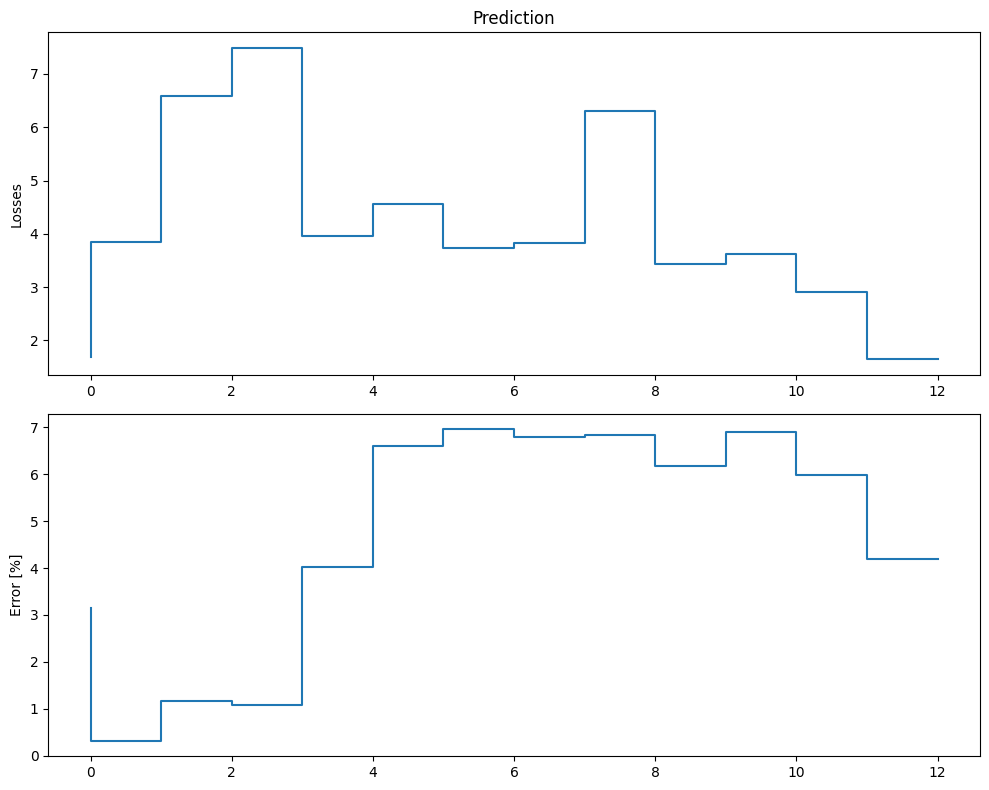

In [12]:
PT_test = np.zeros((time))

for m in range (time):
    PT_test[m] = np.sum([Ptest[m,:]])

Loss_pred = Ptest @ beta
# Loss_pred

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].step(range(time), PT_test)
axs[0].set_title('Prediction')
axs[0].set_ylabel('Losses')

axs[1].step(range(time), Loss_pred / PT_test * 100)
axs[1].set_ylabel('Error [%]')

plt.tight_layout()
plt.show()

# Challenges
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- Assume the grid is a LV grid and rewrite (16) assuming that angle differences are negligible (only voltage magnitudes differences are expressive). Assume that in LV grids, Bij << Gij.
- Replace the matrix X, in Equation 16, for:

    - i) a matrix X' considering the network structure (only use 2.Pi.Pj when a line connection exists). 
    - ii) reducing the dimensionality of X by considering squared injections (Page 33 in the lectures notes) 
    - iii) reducing the dimensionality of X by summing electrically close bus injections before using them as explanatory variables of losses (Page 33 in the lectures notes)

- Compare with the proposed method in a larger network


i) Use 2.Pi.Pj when line connection exists

In [34]:
Y = np.array(PL2)
X = np.zeros((13,10))

for num, val in enumerate(P):
    X[num, 0] = val[0]**2
    X[num, 1] = 2*val[0]*val[1]
    X[num, 2] = 2*val[0]*val[2]
    # X[num, 3] = 2*val[0]*val[3]
    X[num, 4] = val[1]**2
    X[num, 5] = 2*val[1]*val[2]
    # X[num, 6] = 2*val[1]*val[3]
    X[num, 7] = val[2]**2
    X[num, 8] = 2*val[2]*val[3]
    X[num, 9] = val[3]**2

X = np.delete(X, [3, 6], axis=1)
xTx_1 = LA.inv(np.transpose(X) @ X)

beta = xTx_1 @ np.transpose(X) @ Y
print('Beta =', beta)

Beta = [0.01894261 0.02244389 0.00182769 0.01012871 0.02315047 0.00537795
 0.01854592 0.00649225]


# Vector initialization

TO BE DONE. You should compare the three methods considering the test data

<b>Plot Results (Prediction)

TO BE DONE

In [46]:
P_sigma = np.zeros(len(P))

for i, val in enumerate(P):
    P_sigma[i] = P[i, 0:2].sum()

P_sigma

array([0.396, 0.4  , 0.932, 3.8  , 3.508, 4.536, 1.836, 1.392, 2.512,
       4.132, 1.136, 1.076, 1.212])